In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import ydata_profiling

df = pd.read_csv('BankChurners.csv')
df = df.drop(['Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1','Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [58]:
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [59]:
df.columns

Index(['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender',
       'Dependent_count', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [60]:
x = df.index
y = df.Customer_Age
x

RangeIndex(start=0, stop=10127, step=1)

In [61]:
df['Attrition_Flag'] = df['Attrition_Flag'].replace({'Existing Customer': 2, 'Attrited Customer': 1})
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [62]:
gender_count_result = df['Gender'].value_counts()
gender_count_result

F    5358
M    4769
Name: Gender, dtype: int64

In [63]:
attrition_count_male = df[df["Gender"] == 'M'].groupby("Attrition_Flag")["Gender"].value_counts()

attrition_count_male_sum = attrition_count_male.sum()

attrition_count_male /= attrition_count_male_sum
attrition_count_male



Attrition_Flag  Gender
1               M         0.146152
2               M         0.853848
Name: Gender, dtype: float64

In [64]:
attrition_count_female = df[df["Gender"] == 'F'].groupby("Attrition_Flag")["Gender"].value_counts()

attrition_count_female_sum = attrition_count_female.sum()

attrition_count_female /= attrition_count_female_sum
attrition_count_female

Attrition_Flag  Gender
1               F         0.173572
2               F         0.826428
Name: Gender, dtype: float64

In [65]:
df["Card_Category"].unique()

array(['Blue', 'Gold', 'Silver', 'Platinum'], dtype=object)

In [66]:
attrition_count_blue = df[df["Card_Category"] == 'Blue'].groupby("Attrition_Flag")["Card_Category"].value_counts()

attrition_count_blue_sum = attrition_count_blue.sum()

attrition_count_blue /= attrition_count_blue_sum
attrition_count_blue

Attrition_Flag  Card_Category
1               Blue             0.160979
2               Blue             0.839021
Name: Card_Category, dtype: float64

In [67]:
attrition_count_gold = df[df["Card_Category"] == 'Gold'].groupby("Attrition_Flag")["Card_Category"].value_counts()

attrition_count_gold_sum = attrition_count_gold.sum()

attrition_count_gold /= attrition_count_gold_sum
attrition_count_gold

Attrition_Flag  Card_Category
1               Gold             0.181034
2               Gold             0.818966
Name: Card_Category, dtype: float64

In [68]:
attrition_count_silver = df[df["Card_Category"] == 'Silver'].groupby("Attrition_Flag")["Card_Category"].value_counts()

attrition_count_silver_sum = attrition_count_silver.sum()

attrition_count_silver /= attrition_count_silver_sum
attrition_count_silver

Attrition_Flag  Card_Category
1               Silver           0.147748
2               Silver           0.852252
Name: Card_Category, dtype: float64

In [69]:
attrition_count_pt = df[df["Card_Category"] == 'Platinum'].groupby("Attrition_Flag")["Card_Category"].value_counts()

attrition_count_pt_sum = attrition_count_pt.sum()

attrition_count_pt /= attrition_count_pt_sum
attrition_count_pt

Attrition_Flag  Card_Category
1               Platinum         0.25
2               Platinum         0.75
Name: Card_Category, dtype: float64

In [70]:
# !pip install seaborn

In [71]:
df['Card_Category'] = df['Card_Category'].replace({'Platinum': 4, 'Gold': 3, 'Silver':2,'Blue':1})
df['Gender'] = df['Gender'].replace({'M':1, 'F':2})

df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,2,45,1,3,High School,Married,$60K - $80K,1,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,2,49,2,5,Graduate,Single,Less than $40K,1,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,2,51,1,3,Graduate,Married,$80K - $120K,1,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,2,40,2,4,High School,Unknown,Less than $40K,1,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,2,40,1,3,Uneducated,Married,$60K - $80K,1,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [72]:
df['Education_Level'].unique()

array(['High School', 'Graduate', 'Uneducated', 'Unknown', 'College',
       'Post-Graduate', 'Doctorate'], dtype=object)

In [73]:
df['Education_Level'] = df['Education_Level'].replace({'Doctorate': 7, 'Post-Graduate': 6, 'College':5,'Graduate':4, 'Uneducated':3, 'High School':2, 'Unknown':1})

In [74]:
df['Marital_Status'].unique()

array(['Married', 'Single', 'Unknown', 'Divorced'], dtype=object)

In [75]:
df['Marital_Status'] = df['Marital_Status'].replace({'Married':3,'Divorced':4, 'Single':2, 'Unknown':1})

In [76]:
df['Income_Category'].unique()

array(['$60K - $80K', 'Less than $40K', '$80K - $120K', '$40K - $60K',
       '$120K +', 'Unknown'], dtype=object)

In [77]:
df['Income_Category'] = df['Income_Category'].replace({'$120K +':6,'$80K - $120K':5, '$60K - $80K':4, '$40K - $60K':3, 'Less than $40K':2,'Unknown':1})

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  int64  
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  int64  
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  int64  
 6   Marital_Status            10127 non-null  int64  
 7   Income_Category           10127 non-null  int64  
 8   Card_Category             10127 non-null  int64  
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

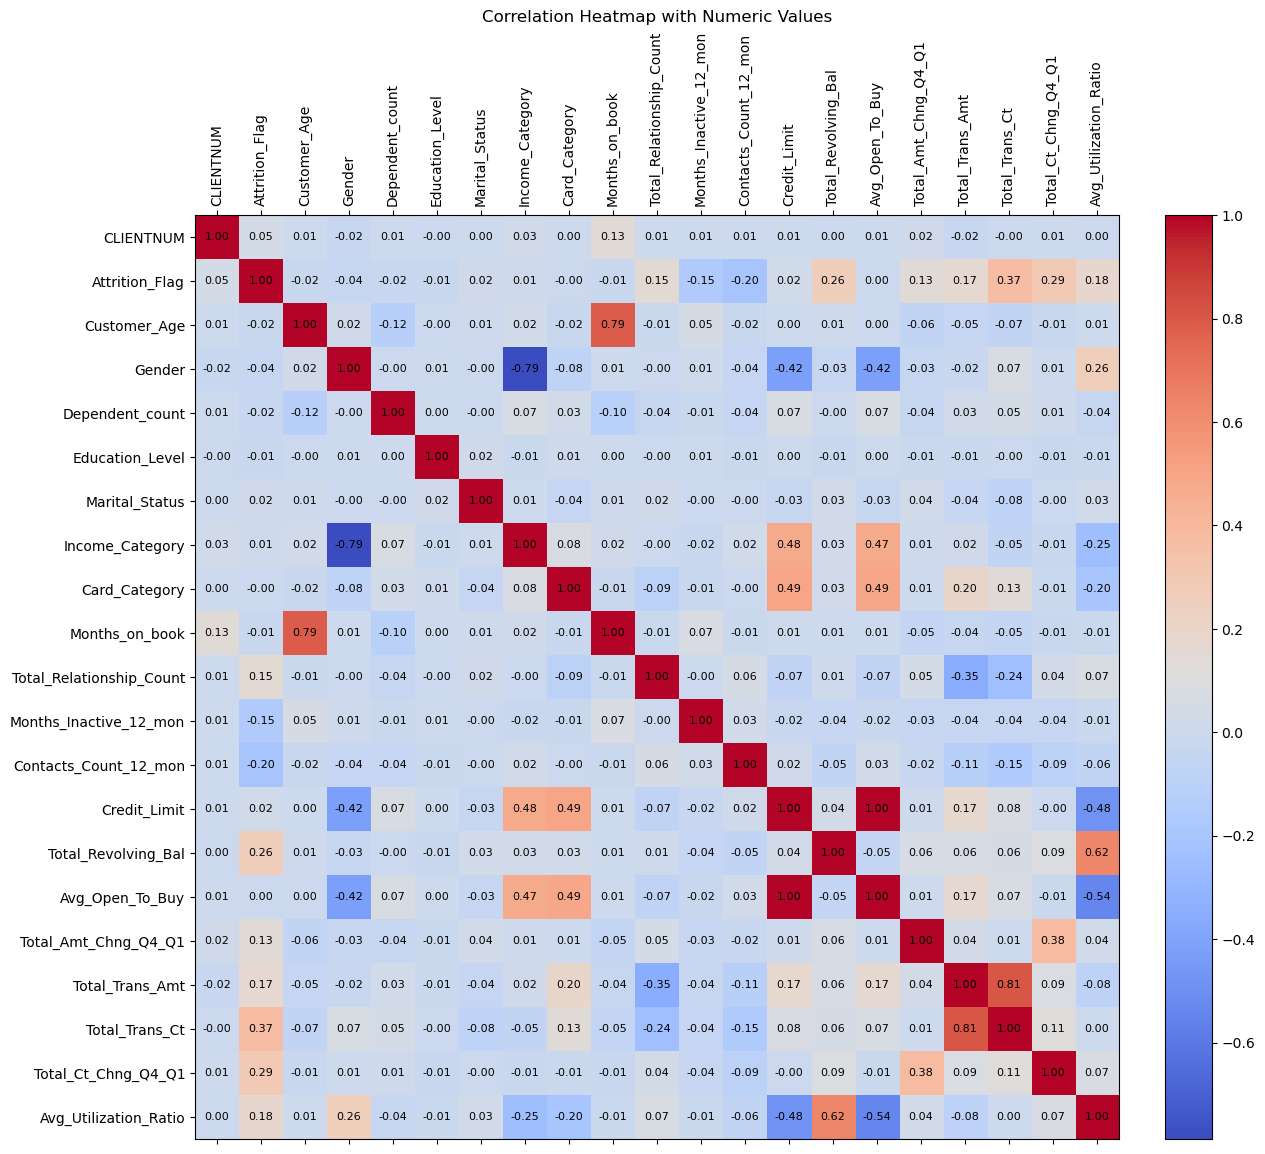

In [81]:
correlation_matrix = df.corr()
import matplotlib.pyplot as plt
%matplotlib inline

# 히트맵 표시
fig, ax = plt.subplots(figsize=(15, 12))
cax = ax.matshow(correlation_matrix, cmap='coolwarm')
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=90)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        text = "{:.2f}".format(correlation_matrix.iloc[i, j])
        ax.text(j, i, text, ha='center', va='center', color='black', fontsize=8)

fig.colorbar(cax, fraction=0.046, pad=0.04)
plt.title('Correlation Heatmap with Numeric Values')
plt.show()

In [80]:
profile = df.profile_report()
profile.to_file("./report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]